In [1]:
# mounting google colab to my drive
!pip install feature-engine
from google.colab import drive
drive.mount('/content/drive')

# to manipulate data
import pandas as pd

# processing and manipulating data in array form
import numpy as np

#for data processing and storage
import ast
import pickle

# for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# for feature engineering process and modeling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, OrdinalEncoder
from sklearn.linear_model import HuberRegressor
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_percentage_error, mean_absolute_error

# to ignore warnings that are typically displayed by Python during code execution
import warnings
warnings.filterwarnings(action='ignore')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 328.9/328.9 kB 3.2 MB/s eta 0:00:00
Mounted at /content/drive


In [2]:
# upload the cleaned data into a dataframe.
df = pd.read_csv('/content/drive/MyDrive/PORTOFOLIO/RideHailing-FarePrediction-LinearRegression/rideshare_kaggle_cleaned.csv')

# IIIa. Data Preprocessing

In the data preprocessing process, I will undertake several steps, which are as follows:

- Creation of Numerical Tables
- Creation of Categorical Tables
- Handling of Outliers
- Data Splitting
- Selection of Features
- Scaling
- Encoding

## Numerical Table Creation

In [3]:
# to generate additional summary statistics from numeric columns in a DataFrame 'df'
df_num = df.describe().columns.tolist()
df[df_num].describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,693071.0,3.465350e+05,200072.508546,0.000000e+00,1.732675e+05,3.465350e+05,5.198025e+05,6.930700e+05
timestamp,693071.0,1.544046e+09,689192.492586,1.543204e+09,1.543444e+09,1.543737e+09,1.544828e+09,1.545161e+09
hour,693071.0,1.161914e+01,6.948114,0.000000e+00,6.000000e+00,1.200000e+01,1.800000e+01,2.300000e+01
day,693071.0,1.779436e+01,9.982286,1.000000e+00,1.300000e+01,1.700000e+01,2.800000e+01,3.000000e+01
month,693071.0,1.158668e+01,0.492429,1.100000e+01,1.100000e+01,1.200000e+01,1.200000e+01,1.200000e+01
price,693071.0,1.654513e+01,8.946069,2.500000e+00,9.500000e+00,1.600000e+01,2.250000e+01,9.750000e+01
distance,693071.0,2.189430e+00,1.138937,2.000000e-02,1.280000e+00,2.160000e+00,2.920000e+00,7.860000e+00
surge_multiplier,693071.0,1.013870e+00,0.091641,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,3.000000e+00
latitude,693071.0,4.233817e+01,0.047840,4.221480e+01,4.235030e+01,4.235190e+01,4.236470e+01,4.236610e+01
longitude,693071.0,-7.106615e+01,0.020302,-7.110540e+01,-7.108100e+01,-7.106310e+01,-7.105420e+01,-7.103300e+01


In [4]:
# create a new variable that only contains numeric data (num_data) & shows the top 5 sequenced data
num_data = df[df_num]
num_data.head(5)

,Unnamed: 0,timestamp,hour,day,month,price,distance,surge_multiplier,latitude,longitude,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,0,1.544953e+09,9,16,12,5.0,0.44,1.0,42.2148,-71.033,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,1,1.543284e+09,2,27,11,11.0,0.44,1.0,42.2148,-71.033,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,2,1.543367e+09,1,28,11,7.0,0.44,1.0,42.2148,-71.033,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,3,1.543554e+09,4,30,11,26.0,0.44,1.0,42.2148,-71.033,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,4,1.543463e+09,3,29,11,9.0,0.44,1.0,42.2148,-71.033,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


In [5]:
# check the number of rows and columns in num_data
num_data.shape

(693071, 47)

In [6]:
# provides information about the number of unique values in each numeric column
for i in num_data.columns:
    print('Column Name : ',i)
    print('Total Unique Values:',num_data[i].nunique())

Column Name :  Unnamed: 0
Total Unique Values: 693071
Column Name :  timestamp
Total Unique Values: 36179
Column Name :  hour
Total Unique Values: 24
Column Name :  day
Total Unique Values: 17
Column Name :  month
Total Unique Values: 2
Column Name :  price
Total Unique Values: 148
Column Name :  distance
Total Unique Values: 549
Column Name :  surge_multiplier
Total Unique Values: 7
Column Name :  latitude
Total Unique Values: 11
Column Name :  longitude
Total Unique Values: 12
Column Name :  temperature
Total Unique Values: 308
Column Name :  apparentTemperature
Total Unique Values: 319
Column Name :  precipIntensity
Total Unique Values: 63
Column Name :  precipProbability
Total Unique Values: 29
Column Name :  humidity
Total Unique Values: 51
Column Name :  windSpeed
Total Unique Values: 291
Column Name :  windGust
Total Unique Values: 286
Column Name :  windGustTime
Total Unique Values: 25
Column Name :  visibility
Total Unique Values: 227
Column Name :  temperatureHigh
Total Uniqu

Based on the number of unique values, categorical indications are visible in the ```'uvIndex'```, ```'surge_multiplier'``` & ```'month'``` columns. Next, I will *capture* in more detail the three columns mentioned above.

In [7]:
num_data['uvIndex'].value_counts()

0    533664
1    146303
2     13104
Name: uvIndex, dtype: int64

In [8]:
num_data['surge_multiplier'].value_counts()

1.00    672096
1.25     11085
1.50      5065
1.75      2420
2.00      2239
2.50       154
3.00        12
Name: surge_multiplier, dtype: int64

In [9]:
num_data['month'].value_counts()

12    406614
11    286457
Name: month, dtype: int64

As can be seen from the data contained, the three columns are categorical.

In [10]:
# delete categorical data in numeric tables
del num_data['month']
del num_data['surge_multiplier']
del num_data['uvIndex']
del num_data['timestamp']
del num_data['Unnamed: 0']

print("Total Column of Numeric Data:", len(num_data.columns))

Total Column of Numeric Data: 42


* The ```'timestamp'``` column was removed because of the information it contains,
already represented in the ```'month'```, ```'day'``` & ```'hour'``` columns.

* The ```'Unnamed: 0'``` column was removed because it does not contain relevant information.


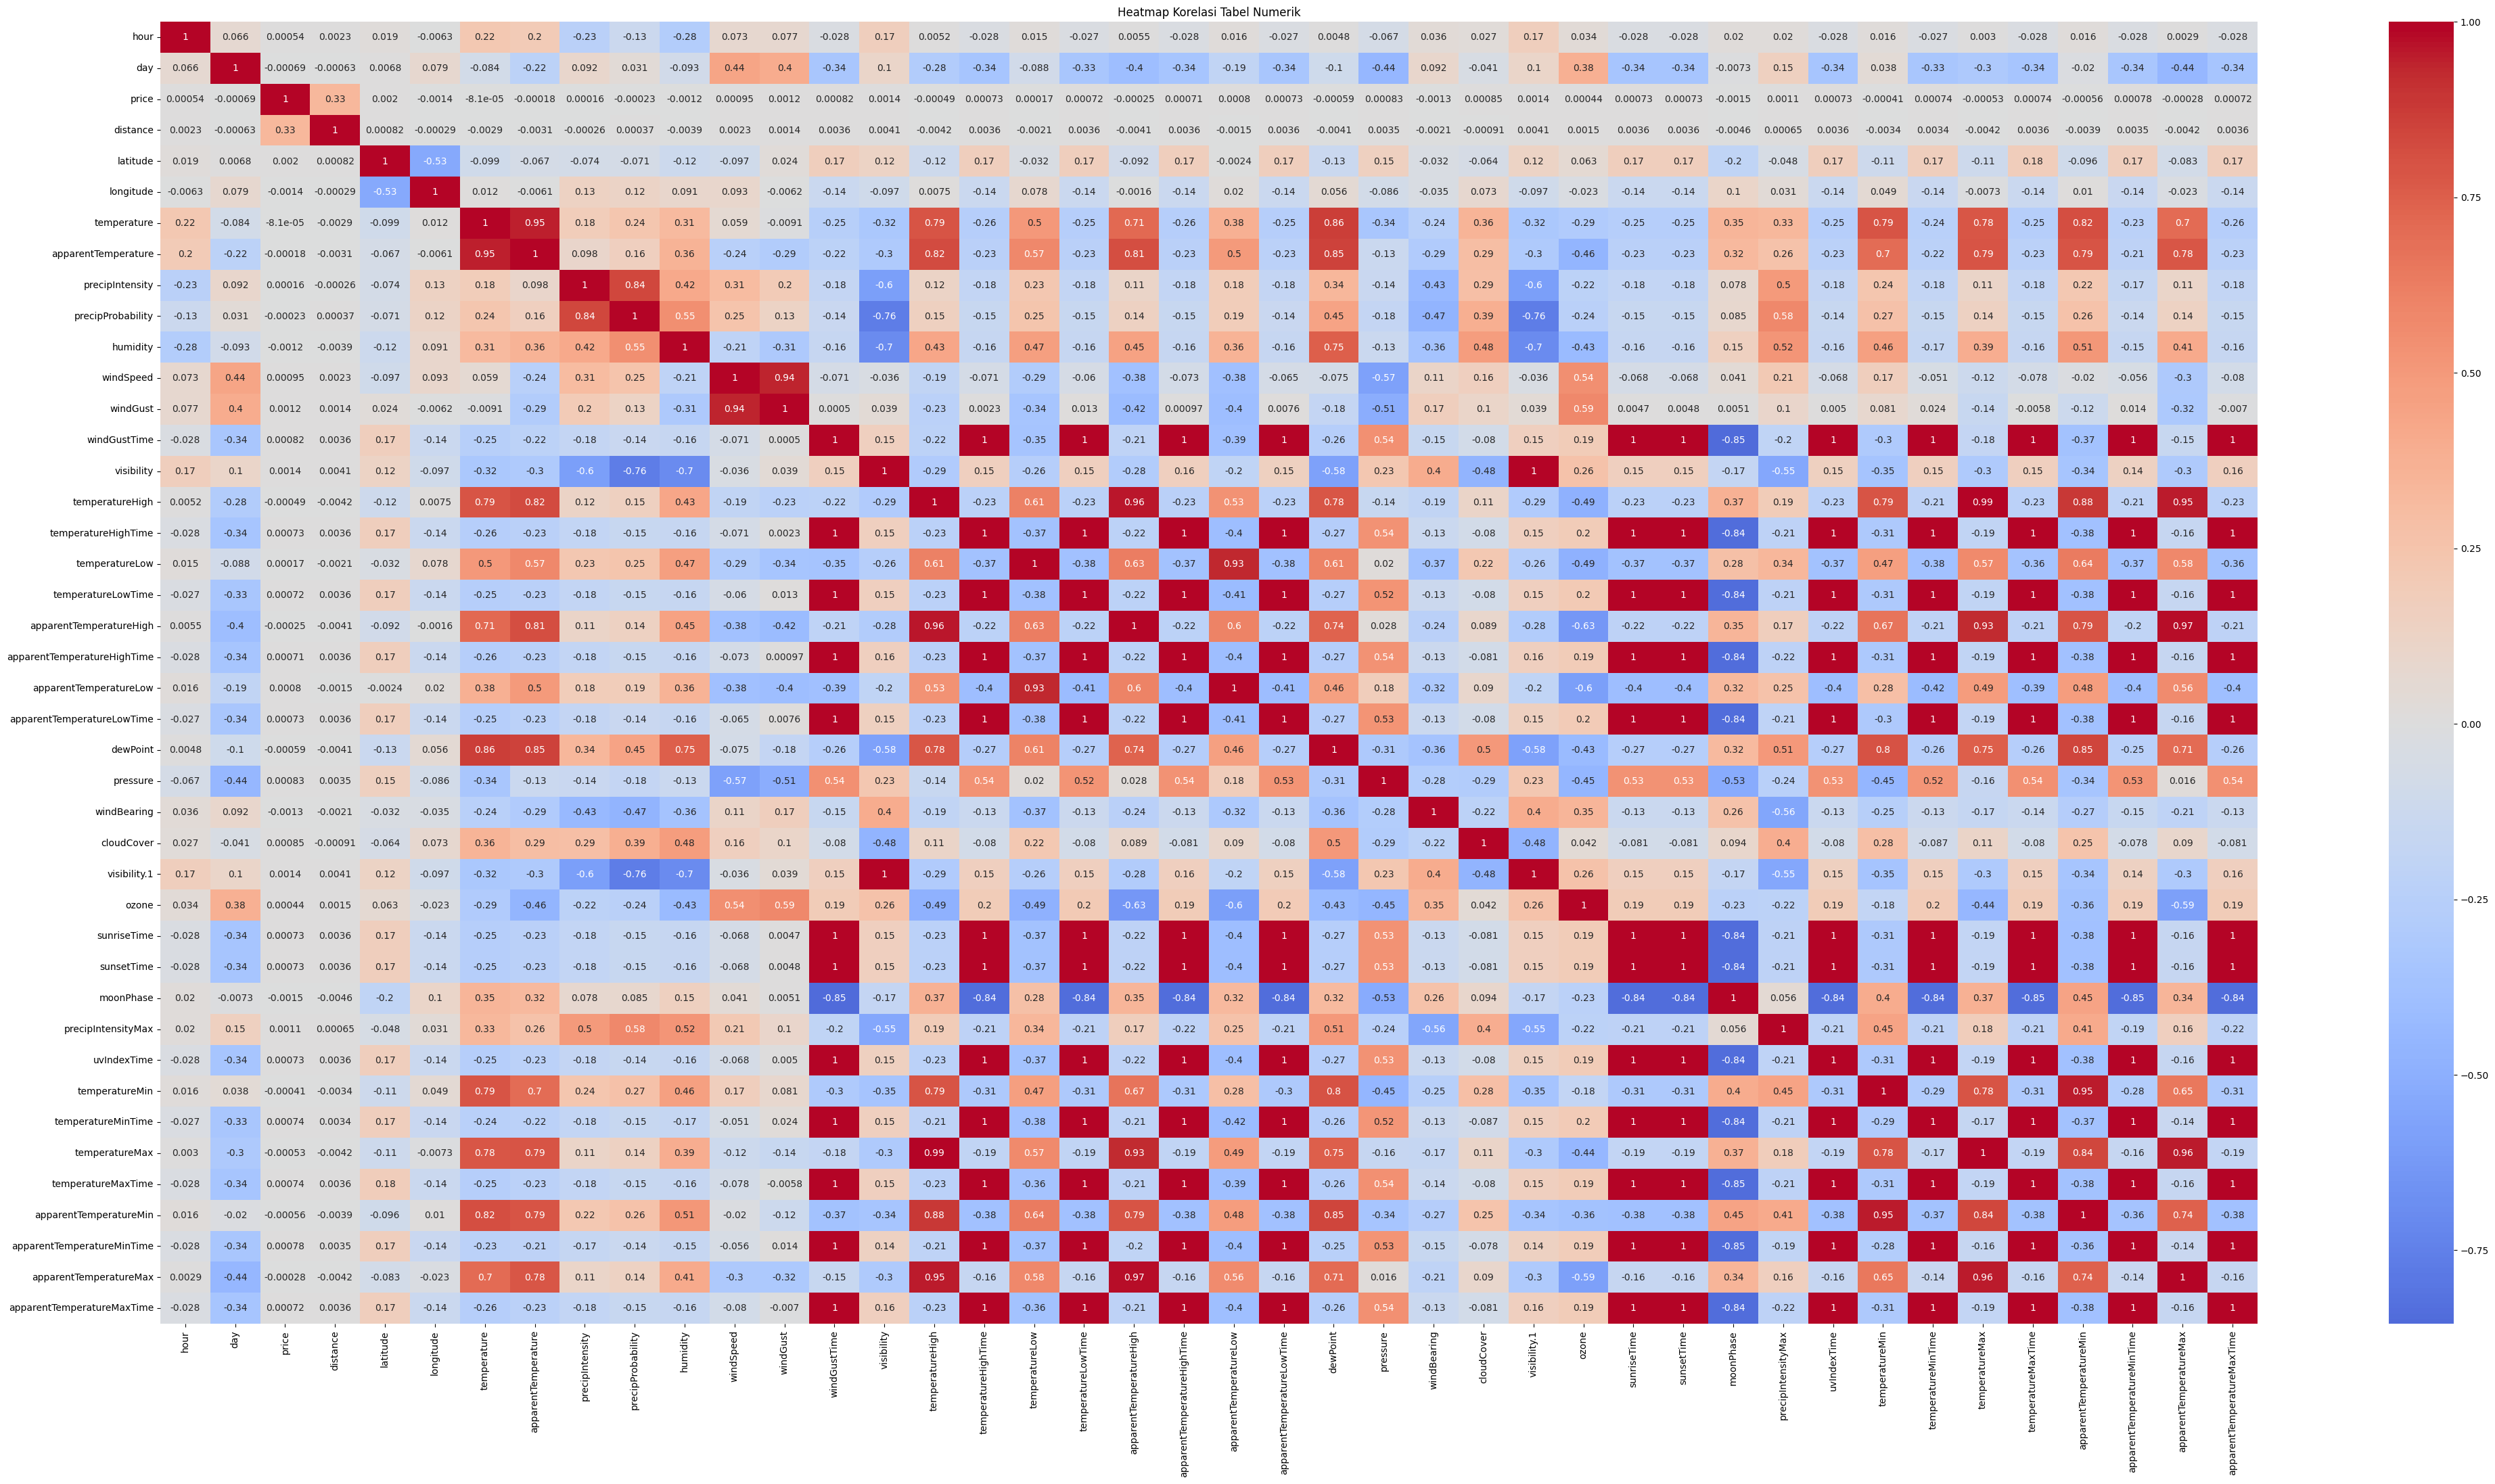

In [11]:
num_data_corr  = num_data.corr()

# create correlation heatmaps with large image sizes
plt.figure(figsize=(50, 25))
sns.heatmap(num_data_corr, annot=True, cmap='coolwarm', center=0)
plt.title('Heatmap Korelasi Tabel Numerik')
plt.show()

As seen from the Heatmap, the ```'distance'``` column has quite a large correlation with the target.

## Categorical Table Creation

In [12]:
# create a new variable that only contains categorical data (cat_data) & for an overview of categorical columns in the dataframe.
cat_data = df.select_dtypes(include=['object']).columns.tolist()
for i in cat_data:
    print(i)
    print()
    print(df[i].value_counts())
    print('-' * 10)

id

424553bb-7174-41ea-aeb4-fe06d4f4b9d7    1
86557077-556d-4cc0-8acf-4d618d5c0a8d    1
fa75d4b4-52c8-4e65-a5e6-335c8268c968    1
2d051bf0-4e5e-4b18-a931-ea15c4fb9066    1
7339fbe3-b0bb-4bac-a037-b1dc2ab0feac    1
                                       ..
0281be2d-1573-47a5-868d-fef6100d1b77    1
33827bd1-5164-4579-b567-14e85220c99b    1
6c736bfe-40d0-47b9-be59-ef41d9df516b    1
7311da4b-0932-4572-97ee-242a9e5f0229    1
e7fdc087-fe86-40a5-a3c3-3b2a8badcbda    1
Name: id, Length: 693071, dtype: int64
----------
datetime

2018-11-26 23:21:14    156
2018-11-29 01:02:08    156
2018-11-26 23:33:14    156
2018-11-28 15:56:08    156
2018-11-28 14:29:08    156
                      ... 
2018-12-01 14:18:01      6
2018-12-16 12:55:06      4
2018-11-28 09:32:17      3
2018-12-13 15:10:13      1
2018-11-30 13:17:58      1
Name: datetime, Length: 31350, dtype: int64
----------
timezone

America/New_York    693071
Name: timezone, dtype: int64
----------
source

Financial District         58857
Thea

In [13]:
# define categorical data
cat_data = df[['id','timestamp','month', 'timezone', 'source', 'destination', 'cab_type', 'product_id',
                'name','surge_multiplier', 'short_summary', 'long_summary','uvIndex', 'icon']]


print("Categorial Columns:", len(cat_data.columns))

Categorial Columns: 14


In [15]:
# Calculate correlation using Kendall Tau method
def CalculateCorrelation(col):
    corr_kendall = cat_data[col].corr(df['price'], method='kendall')
    print('Column Name: ', col)
    print('Kendall Tau:', corr_kendall)

# Call the function for each column to be analyzed
for column in cat_data.columns:
    CalculateCorrelation(column)

Column Name:  id
Kendall Tau: 0.000397783664653164
Column Name:  timestamp
Kendall Tau: 3.090207729485372e-05
Column Name:  month
Kendall Tau: 0.0007943587888690968
Column Name:  timezone
Kendall Tau: nan
Column Name:  source
Kendall Tau: -0.011740263630617758
Column Name:  destination
Kendall Tau: -0.028966796873808962
Column Name:  cab_type
Kendall Tau: -0.026846457167933477
Column Name:  product_id
Kendall Tau: -0.0010839614664061607
Column Name:  name
Kendall Tau: -0.38143976552843023
Column Name:  surge_multiplier
Kendall Tau: 0.12983981497457758
Column Name:  short_summary
Kendall Tau: 0.0002770605288872202
Column Name:  long_summary
Kendall Tau: 0.0009543122909147889
Column Name:  uvIndex
Kendall Tau: -0.0001119119021417009
Column Name:  icon
Kendall Tau: 0.0013983399700478168


From the results of the Kendall Tau correlation calculation on categorical columns against the target:

The column ```'surge_multiplier'``` (Kendall Tau score of 0.129) appears to have a relatively strong correlation with the target variable. Prices of rides tend to be higher during "primetime," which is the time when people typically start their activities, often in the morning. This may indicate that during periods of high demand and limited supply, such as rush hours or busy times, ride prices tend to increase.

There is an inverse relationship observed in the column ```'name'``` (Kendall Tau score of -0.381) with the target variable. This could be attributed to the differences in the types of services provided. For instance, ride prices for premium services like 'Lux Black' may be higher compared to regular services like 'UberX'. This negative correlation suggests that the choice of service name has an impact on ride prices, with premium services generally resulting in higher fares.

In [16]:
# display unique values in each categorical data
for i in cat_data:
    print('Column: ',i)
    print('Total unique labels: ', df[i].nunique())
    print('-' * 30)

Column:  id
Total unique labels:  693071
------------------------------
Column:  timestamp
Total unique labels:  36179
------------------------------
Column:  month
Total unique labels:  2
------------------------------
Column:  timezone
Total unique labels:  1
------------------------------
Column:  source
Total unique labels:  12
------------------------------
Column:  destination
Total unique labels:  12
------------------------------
Column:  cab_type
Total unique labels:  2
------------------------------
Column:  product_id
Total unique labels:  13
------------------------------
Column:  name
Total unique labels:  13
------------------------------
Column:  surge_multiplier
Total unique labels:  7
------------------------------
Column:  short_summary
Total unique labels:  9
------------------------------
Column:  long_summary
Total unique labels:  11
------------------------------
Column:  uvIndex
Total unique labels:  3
------------------------------
Column:  icon
Total unique lab

In [17]:
# delete columns 'id', 'timestamp', 'product_id', and 'timezone'
del cat_data['id']
del cat_data['timestamp']
del cat_data['product_id']
del cat_data['timezone']

* The ```'id'``` column was removed because it has high cardinality, there are too many unique values in it.
* The ```'timestamp'``` column was deleted because the data in it has been generalized in the ```'month'```, ```'day'``` & ```'hour'``` columns.
* The values in the ```'product_id'``` column are represented more generally in the ```'cab_type'``` column.
* Based on my *personal judgment*, the ```'timezone'``` column has a very small correlation to the target because the *value* in it is small, and too general.

In [18]:
# combines numerical and categorical features
combined_data = pd.concat([num_data, cat_data], axis=1)
combined_data.head()

,hour,day,price,distance,latitude,longitude,temperature,apparentTemperature,precipIntensity,precipProbability,...,month,source,destination,cab_type,name,surge_multiplier,short_summary,long_summary,uvIndex,icon
0,9,16,5.0,0.44,42.2148,-71.033,42.34,37.12,0.0000,0.0,...,12,Haymarket Square,North Station,Lyft,Shared,1.0,Mostly Cloudy,Rain throughout the day.,0,partly-cloudy-night
1,2,27,11.0,0.44,42.2148,-71.033,43.58,37.35,0.1299,1.0,...,11,Haymarket Square,North Station,Lyft,Lux,1.0,Rain,"Rain until morning, starting again in the eve...",0,rain
2,1,28,7.0,0.44,42.2148,-71.033,38.33,32.93,0.0000,0.0,...,11,Haymarket Square,North Station,Lyft,Lyft,1.0,Clear,Light rain in the morning.,0,clear-night
3,4,30,26.0,0.44,42.2148,-71.033,34.38,29.63,0.0000,0.0,...,11,Haymarket Square,North Station,Lyft,Lux Black XL,1.0,Clear,Partly cloudy throughout the day.,0,clear-night
4,3,29,9.0,0.44,42.2148,-71.033,37.44,30.88,0.0000,0.0,...,11,Haymarket Square,North Station,Lyft,Lyft XL,1.0,Partly Cloudy,Mostly cloudy throughout the day.,0,partly-cloudy-night


## Handling Outlier

In [19]:
# check skewness in combined data dataframe
combined_data.skew()

hour                          -0.045432
day                           -0.375471
price                          1.089967
distance                       0.834395
latitude                      -2.116052
longitude                     -0.354442
temperature                   -0.609040
apparentTemperature           -0.393775
precipIntensity                3.325536
precipProbability              2.027870
humidity                      -0.075395
windSpeed                      0.451110
windGust                       1.118739
windGustTime                   0.439010
visibility                    -1.507075
temperatureHigh                0.076218
temperatureHighTime            0.429892
temperatureLow                -0.334683
temperatureLowTime             0.441533
apparentTemperatureHigh        0.069811
apparentTemperatureHighTime    0.426763
apparentTemperatureLow        -0.501241
apparentTemperatureLowTime     0.437411
dewPoint                      -0.498345
pressure                       0.154224


Considering my application of the **Huber Regressor**, known for its robustness to outliers, I will focus on capturing these outliers without engaging in direct handling or correction

## Data Splitting

In [20]:
# split features & target
X= combined_data.drop('price', axis=1)
y= combined_data['price']

In [21]:
# separate into train and test
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size= 0.3,
                                                  random_state=2023
                                                   )

In [22]:
# shows the size of the data
print('Train Size : ', X_train.shape)
print('Test Size  : ', X_test.shape)
print('Train Size : ', y_train.shape)
print('Test Size  : ', y_test.shape)

Train Size :  (485149, 51)
Test Size  :  (207922, 51)
Train Size :  (485149,)
Test Size  :  (207922,)


In [23]:
# shows the first sequence data
X_train.head(1)

,hour,day,distance,latitude,longitude,temperature,apparentTemperature,precipIntensity,precipProbability,humidity,...,month,source,destination,cab_type,name,surge_multiplier,short_summary,long_summary,uvIndex,icon
281504,0,29,1.71,42.3503,-71.081,39.41,33.81,0.0,0.0,0.69,...,11,Theatre District,North End,Lyft,Lux,1.0,Mostly Cloudy,Mostly cloudy throughout the day.,0,partly-cloudy-night


In [24]:
# turns y_train into a dataframe and shows the top 5 dataframes
y_train = pd.DataFrame(y_train)
y_train.head()

,price
281504,16.500000
353756,16.500000
510202,16.545125
268918,57.500000
457135,10.500000


## Feature Selection

Based on the results of the heatmap visualization for numerical columns and the Kendall Tau calculation on numerical columns, I have decided to use the following columns: ```'distance'```, ```'surge_multiplier'``` and ```'name'``` as features for my modeling.

In [25]:
# selects only selected columns from DataFrame X_train and X_test
X_train = X_train[['name','distance','surge_multiplier']]
X_test = X_test[['name','distance','surge_multiplier']]

## Scaling

In [26]:
# separate numeric and categorical columns
numerical_columns = X_train.select_dtypes(include=np.number).columns.tolist()
categorical_columns = X_train.select_dtypes(include=['object']).columns.tolist()

X_train_numerical = X_train[numerical_columns]
X_train_categorical = X_train[categorical_columns]

X_test_numerical = X_test[numerical_columns]
X_test_categorical = X_test[categorical_columns]

print(f'X train numerical size:', X_train_numerical.shape)
print(f'X test categorical size:', X_train_categorical.shape)
print(f'X train numerical size:', X_test_numerical.shape)
print(f'X test categorical size:', X_test_categorical.shape)

print(X_train_numerical.head())
print(X_train_categorical.head())

X train numerical size: (485149, 2)
X test categorical size: (485149, 1)
X train numerical size: (207922, 2)
X test categorical size: (207922, 1)
        distance  surge_multiplier
281504      1.71              1.00
353756      2.93              1.00
510202      1.34              1.00
268918      4.36              1.75
457135      0.64              1.00
             name
281504        Lux
353756    Lyft XL
510202       Taxi
268918  Lux Black
457135    Lyft XL


In [27]:
# perform scaling using MinMaxScaler
scaler = MinMaxScaler()
X_train_numerical_scaled = scaler.fit_transform(X_train_numerical)
X_test_numerical_scaled = scaler.transform(X_test_numerical)


In [30]:
# display scaled X_train_numerical
X_train_numerical_scaled

array([[0.21556122, 0.        ],
       [0.37117347, 0.        ],
       [0.16836735, 0.        ],
       ...,
       [0.57780612, 0.        ],
       [0.14285714, 0.        ],
       [0.17091837, 0.        ]])

In [31]:
# display scaled X_test_numerical
X_test_numerical_scaled

array([[0.4247449 , 0.        ],
       [0.17602041, 0.        ],
       [0.33673469, 0.        ],
       ...,
       [0.27806122, 0.        ],
       [0.3622449 , 0.        ],
       [0.2869898 , 0.        ]])

## Encoding

In [32]:
# the process of encoding categories using OneHotEncoder.
encoder = OneHotEncoder(drop='first')
X_train_categorical_encoded = encoder.fit_transform(X_train_categorical).toarray()

# transform data testing
X_test_categorical_encoded = encoder.transform(X_test_categorical).toarray()

In [35]:
# display encoded X_train_categorical
X_train_categorical_encoded

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [36]:
# display encoded X_test_categorical
X_test_categorical_encoded

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [38]:
# combine the scaled and encoded numerical and categorical DataFrames

X_train_final = np.hstack((X_train_numerical_scaled, X_train_categorical_encoded))
X_test_final = np.hstack((X_test_numerical_scaled, X_test_categorical_encoded))

print(X_train_final.shape)
print(X_test_final.shape)

(485149, 14)
(207922, 14)


# IIIb. Modeling

## Model Definition

In [39]:
# define the model
huber_model = HuberRegressor()

## Model Training

In [40]:
# train the model
huber_model.fit(X_train_final, y_train)


HuberRegressor()

## Model Evaluation

In [43]:
# generating predictions using a trained model and assessing the predictive performance on both the training and testing datasets.
y_train_pred = huber_model.predict(X_train_final)
y_test_pred = huber_model.predict(X_test_final)

print(y_train_pred)

print('')

print(y_test_pred)

print("\nNumber of rows in y_train:", y_train.shape[0])
print("Number of rows in y_test:", y_test.shape[0])
print("Number of rows in y_train_pred:", len(y_train_pred))
print("Number of rows in y_test_pred:", len(y_test_pred))

[15.69732096 16.35493693 14.74572044 ... 15.32093535  3.67724687
  7.1826802 ]

[19.6332271   7.75606244  9.92816314 ...  8.82418947 11.25997888
  9.84401265]

Number of rows in y_train: 485149
Number of rows in y_test: 207922
Number of rows in y_train_pred: 485149
Number of rows in y_test_pred: 207922


In [44]:
# MAE (Mean Absolute Error) Train and Test:
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
print(f'MAE Train:', mae_train)
print(f'MAE Test:', mae_test)

# MSE (Mean Squared Error) Train and Test:
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
print(f'\nMSE Train:', mse_train)
print(f'MSE Test:', mse_test)

# RMSE (Root Mean Squared Error) Train and Test:
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)
print(f'\nRMSE Train:', rmse_train)
print(f'RMSE Test:', rmse_test)

# R2 Score (Coefficient of Determination) Train and Test:
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
print(f'\nR2 Train:', r2_train)
print(f'R2 Test:', r2_test)

# MAPE (Mean Absolute Percentage Error) Train and Test:
mape_train_rounded = mean_absolute_percentage_error(y_train, y_train_pred)* 100
mape_test_rounded = mean_absolute_percentage_error(y_test, y_test_pred) * 100

print('\nMAPE Train:', mape_train_rounded)
print('MAPE Test:', mape_test_rounded)

MAE Train: 1.7814127935065633
MAE Test: 1.7786982493125456

MSE Train: 6.822961785709348
MSE Test: 6.80607023696175

RMSE Train: 2.6120799730692297
RMSE Test: 2.608844617251428

R2 Train: 0.9147889360795899
R2 Test: 0.9148606574784924

MAPE Train: 12.352604325765892
MAPE Test: 12.368639744450999


In general, based on these results, it can be concluded that this model exhibits strong performance in predicting target values. This conclusion is drawn from the low error metrics (MAE, MSE, RMSE) and the high R2 value. Additionally, the relatively low MAPE suggests that the model tends to provide accurate estimations of prices.

In [46]:
# verify the outcomes of the Intercept and Slope
intercept = huber_model.intercept_
slope = huber_model.coef_

print('Intercept : ', intercept)
print('Slope : ', slope)

Intercept :  14.884001848461182
Slope :  [ 18.81555129  33.30206215   9.84353802  -3.24258416   1.8104879
  10.70676198 -10.91724496  -5.51289837 -13.89469088  -3.30620586
 -11.29168761 -10.43986043  -4.94648967 -10.43480724]


**Intercept**: The intercept represents the predicted value when all independent features (independent variables) in the model are zero. In this context, the intercept is approximately 14.8840. It serves as the estimated value for the target variable when there is no influence from the independent features.

**Slope (Coefficients)**: Each number in the slope vector corresponds to a coefficient associated with each independent feature in the model. These coefficients depict the extent to which each feature influences the target variable. In this case, there are 14 coefficients corresponding to the 14 independent features.

For instance, the first coefficient (18.8156) is associated with the first feature.
The second coefficient (33.3021) is associated with the second feature.
So on and so forth for all other coefficients

In [47]:
# Model Saving

with open('model_scaler.pkl', 'wb') as file_1:
  pickle.dump(scaler, file_1)

with open('model_encoder.pkl', 'wb') as file_2:
  pickle.dump(encoder, file_2)

with open('huber_model.pkl', 'wb') as file_3:
  pickle.dump(huber_model, file_3)

with open('list_num_columns.txt', 'w') as file_4:
  file_4.write(str(numerical_columns))

with open('list_cat_columns.txt', 'w') as file_5:
  file_5.write(str(categorical_columns))